# DSCI513 Databases and Data Retrieval

> Quiz 1 Review

# 1. Intro
---

> What is database/DBMS/RDBMS, why, properties?

<!-- <div class="alert alert-block alert-info">
    <b>DBMS</b>
</div> -->

## 1). Definitions

<li><b><font color=Salmon>database VS CSV</font></b></li>

A database is an organized collection of structured information, or data, typically stored electronically in a computer system. A database is usually controlled by a database management system (DBMS). Together, the data and the DBMS, along with the applications that are associated with them, are referred to as a database system, often shortened to just database.


<li><b><font color=Salmon>table/tuples/schemas/relations</font></b></li> 

[schema](https://www.tutorialspoint.com/dbms/dbms_data_schemas.htm)

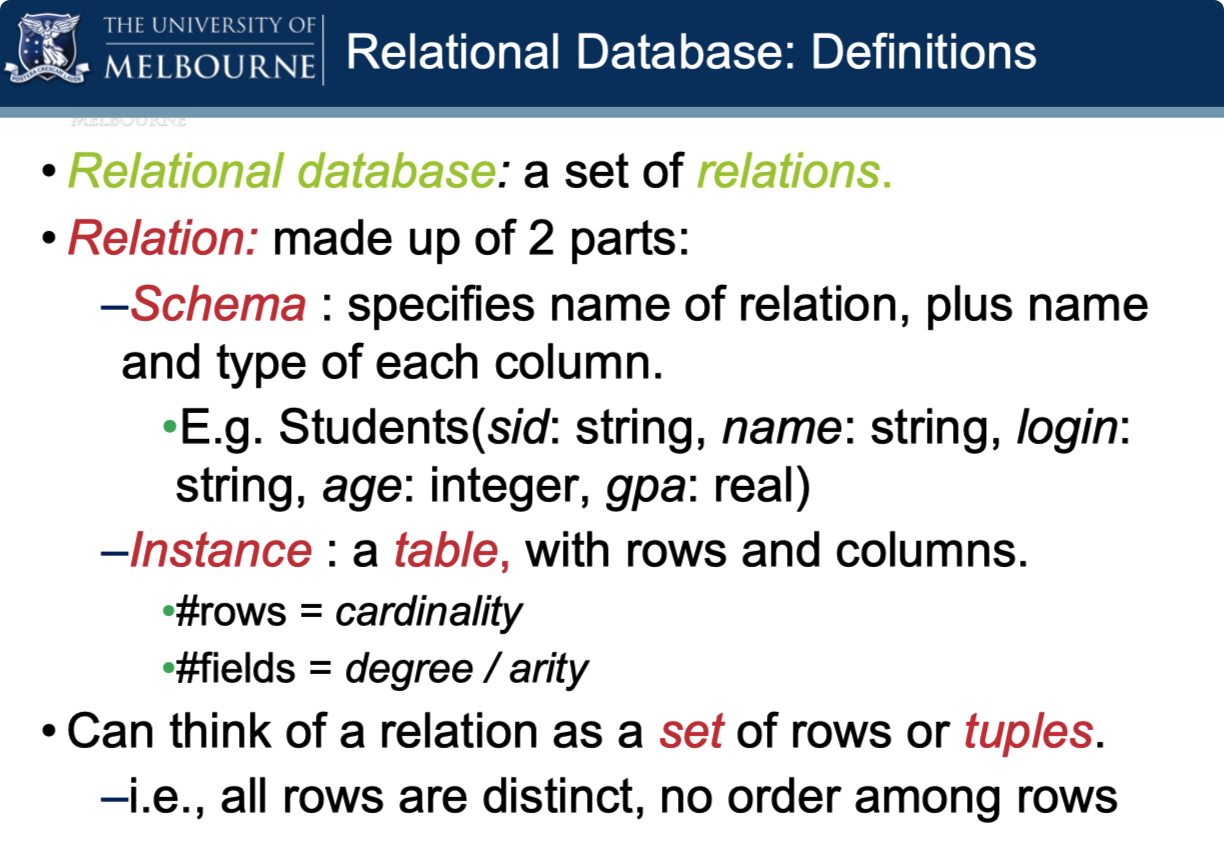

    
<li><b><font color=Salmon>DBMS</font></b></li>

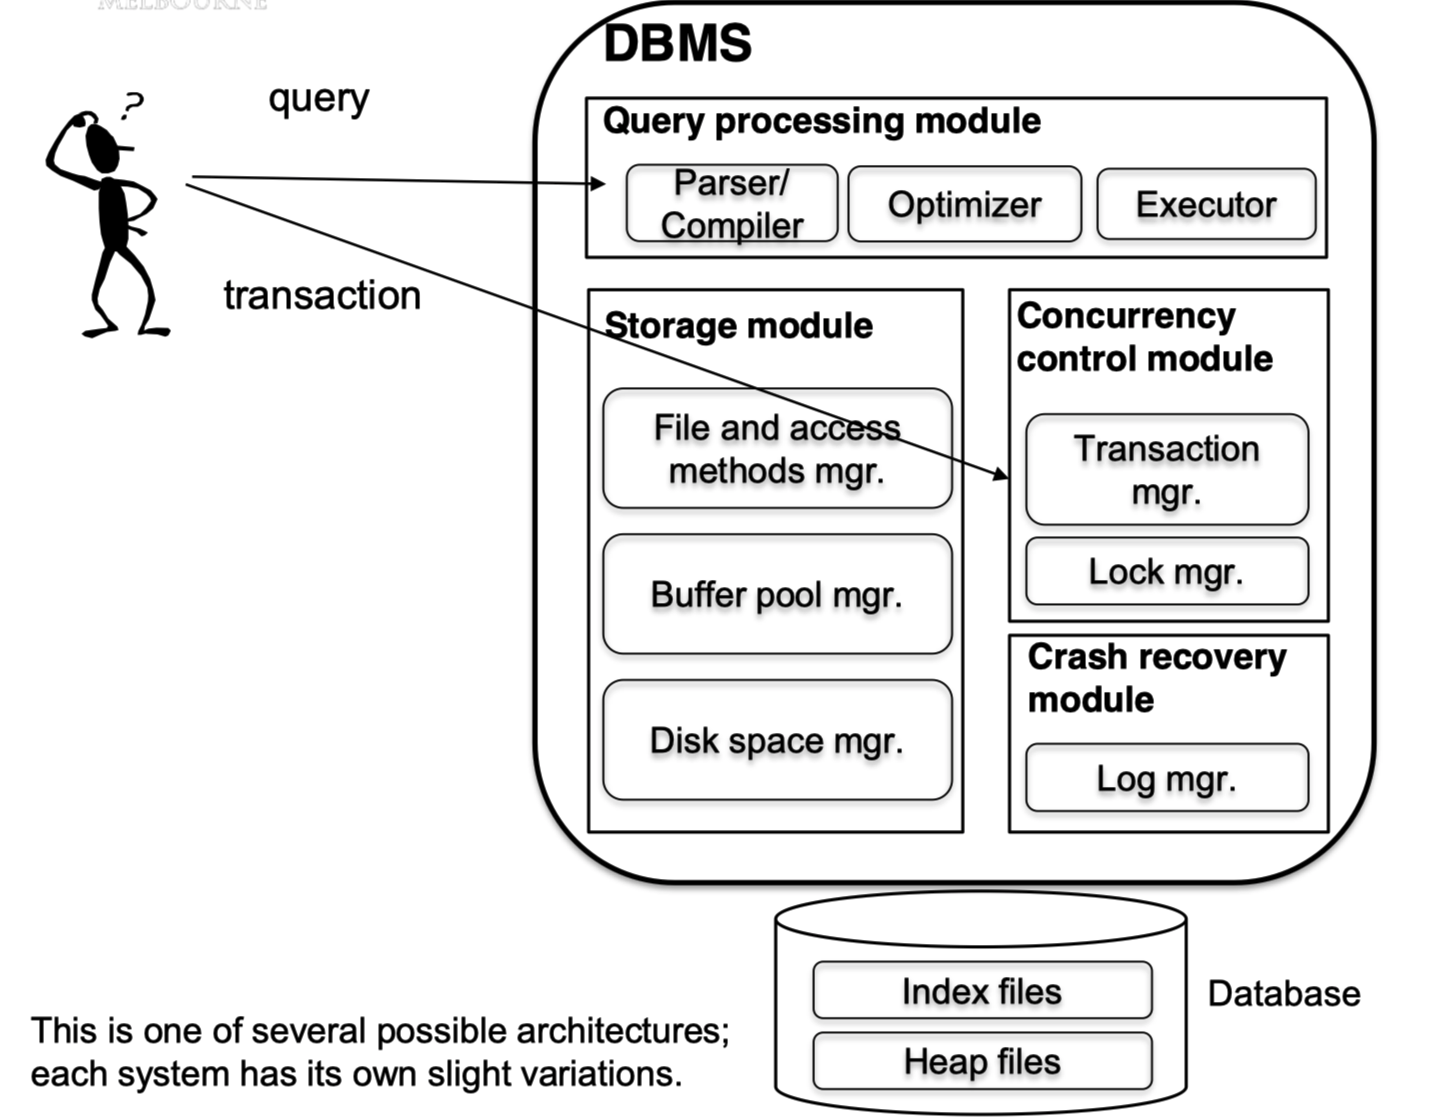

A database management system (DBMS) is software that controls the storage, organization, and retrieval of data. Typically, a DBMS has the following elements:
- Kernel code
This code manages memory and storage for the DBMS.
- Repository of metadata
This repository is usually called a data dictionary.
- Query language
This language enables applications to access the data.

<li><b><font color=Salmon>RDBMS</font></b></li>
 
A management system that moves data into a relational database, stores the data, and retrieves it so that applications can manipulate it.


<li><b><font color=Salmon>What Is Structured Query Language (SQL)?</font></b></li>

SQL is a programming language used by nearly all relational databases to query, manipulate, and define data, and to provide access control.

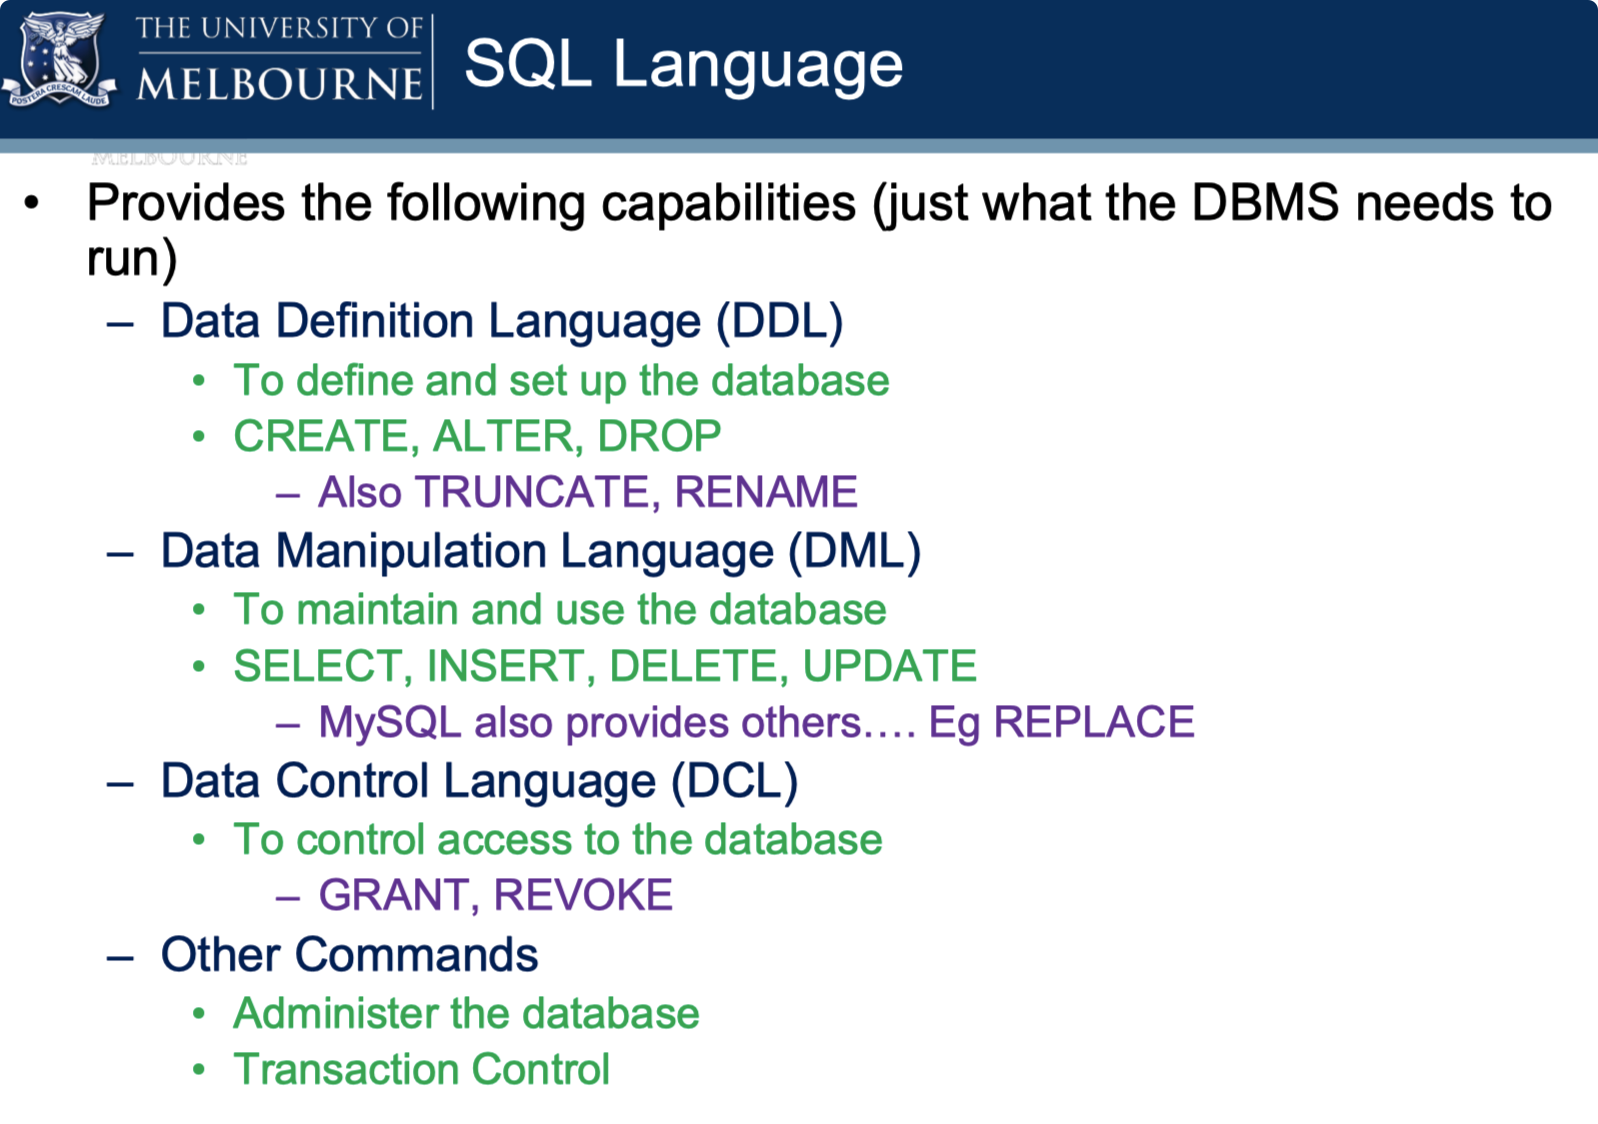


## 2). Keys

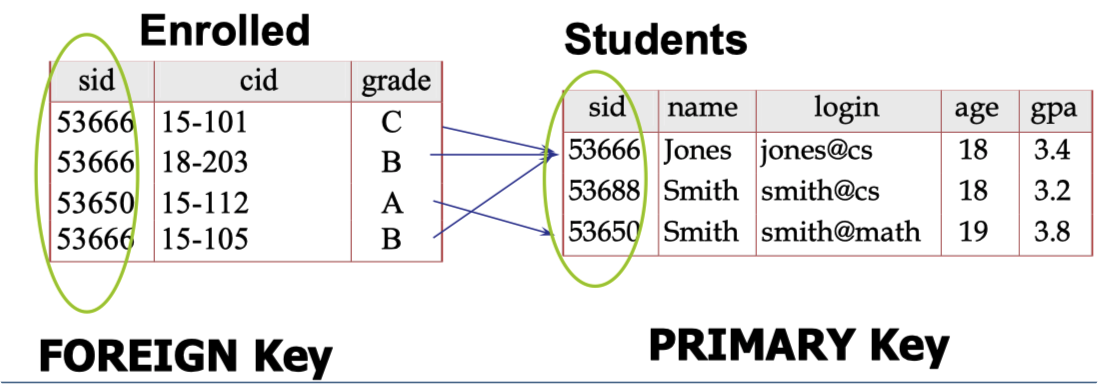

- Key: The set of attributes which can uniquely identify a tuple/row is known as (Super) Key.
- Candidate Key: The minimal set of attribute which can uniquely identify a tuple is known as candidate key.
- Primary Key: There can be more than one candidate key in relation out of which one can be chosen as the primary key.
- Foreign key : Set of fields in one relation that is used to `refer’ to a tuple in another relation.
    - Must correspond to the primary key of the other relation.
    - Like a `logical pointer’.

## 2). ACID  
> **Transaction:** A transaction is a unit of work that you want to treat as "a whole." It has to either happen in full or not at all. A classical example is transferring money from one bank account to another. 

Required Properties of Transactions(ACID) 


<b>
    <font color=Salmon>
        <li>Atomicity</li>
        <li>Consistency</li>
        <li>Isolation</li>
        <li>Durability</li>
    </font>
</b>

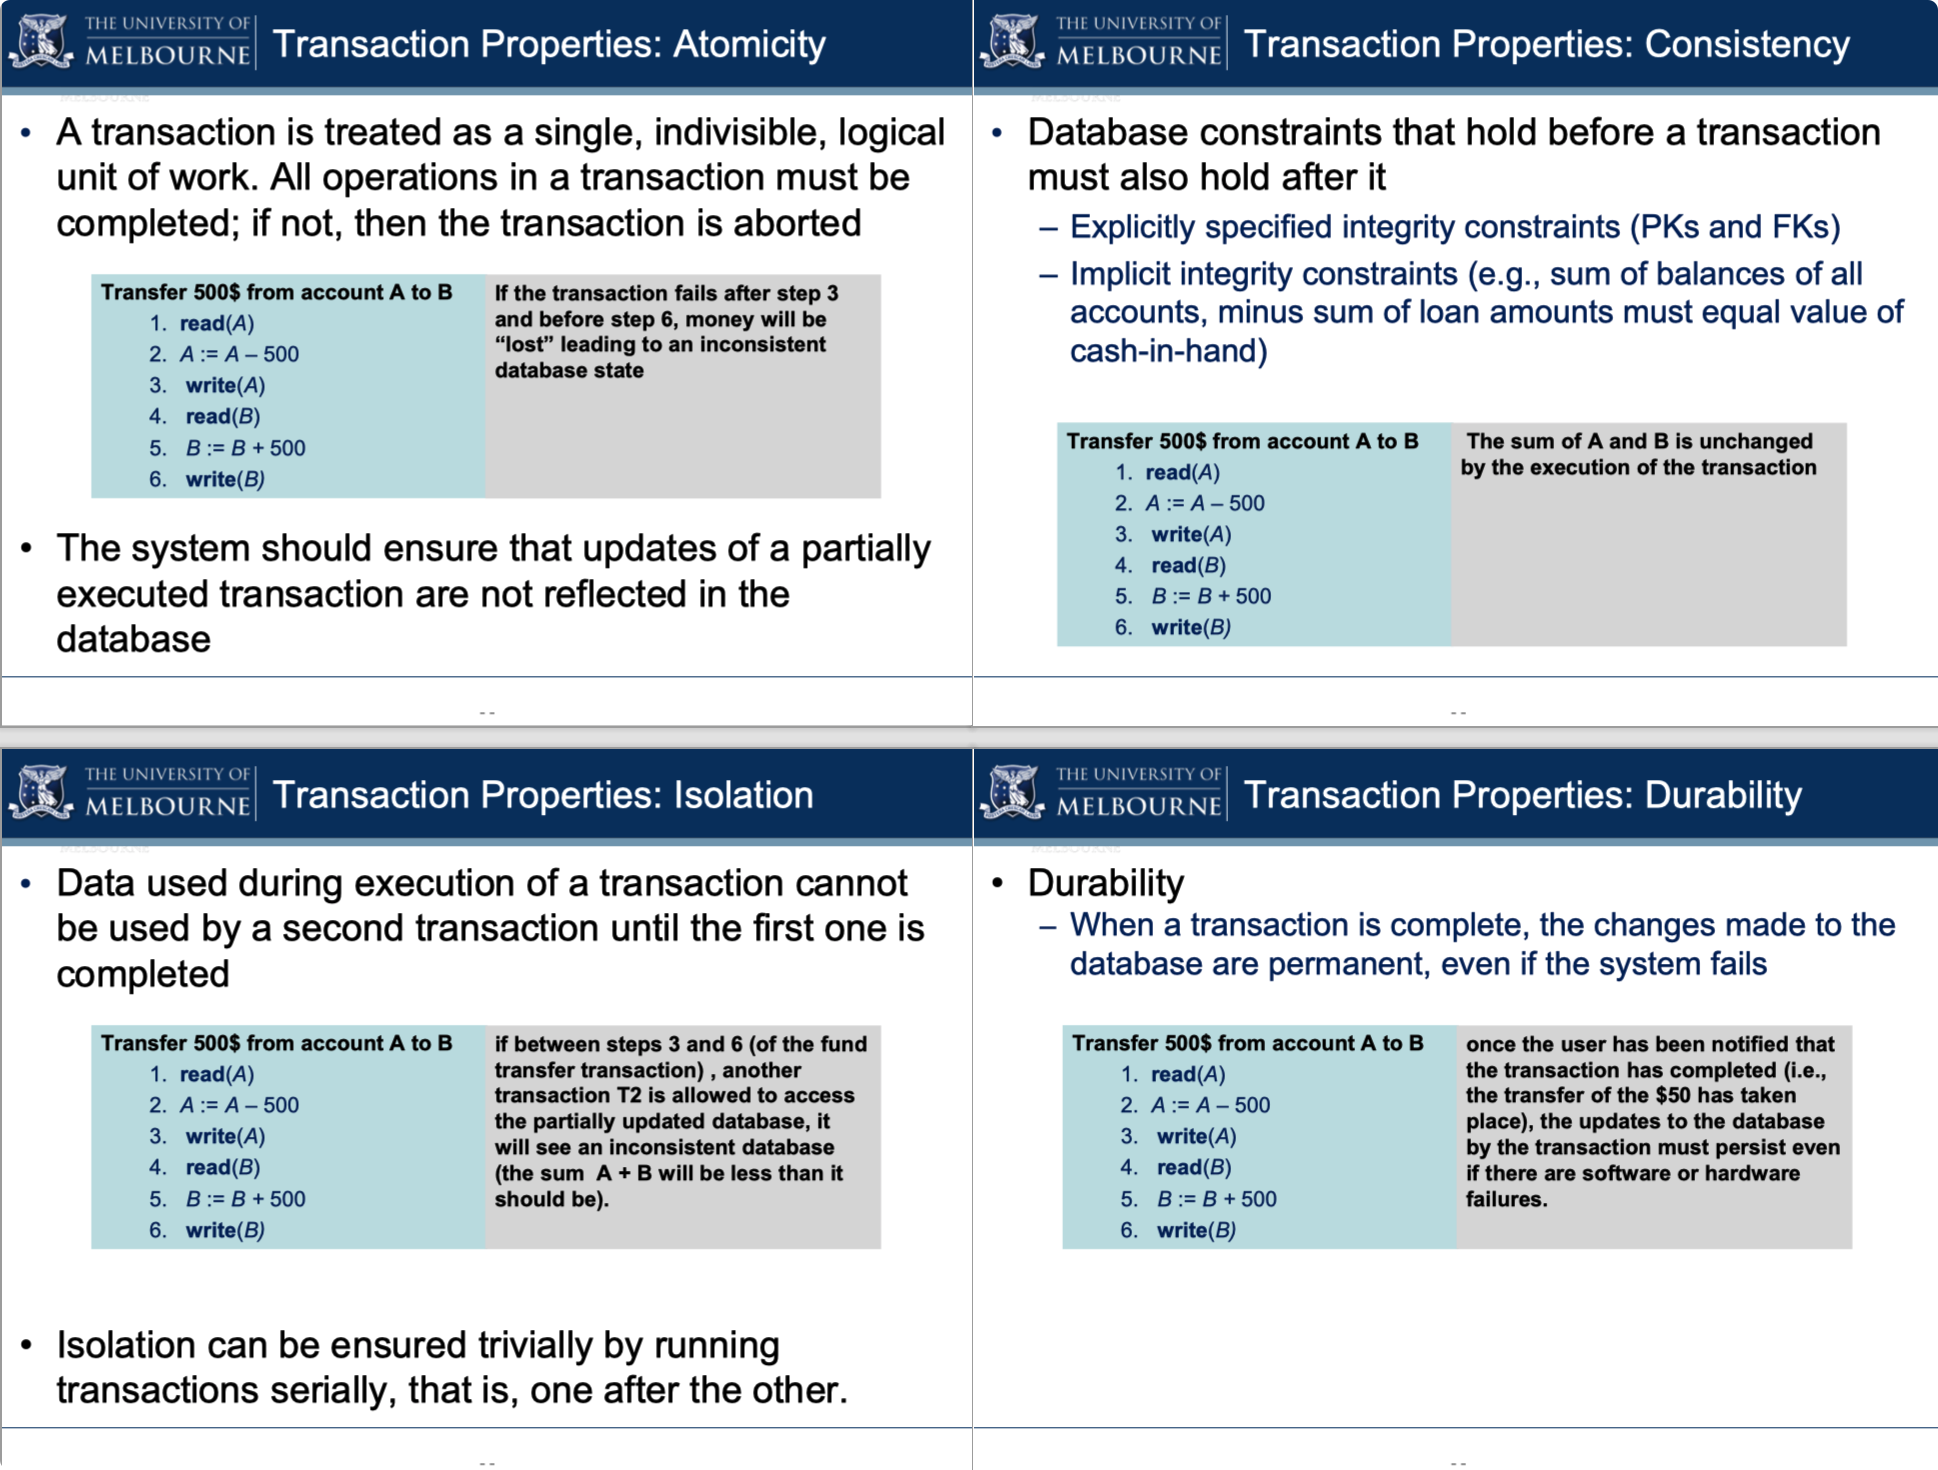


## 3). Normalization

[VIDEO](https://www.youtube.com/watch?v=J-drts33N8g)


# 2. Access remote database
---

In [1]:
import os
import json
import psycopg2
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data
from sklearn.naive_bayes import GaussianNB
from canvasutils.submit import submit, convert_notebook

In [2]:
with open('data/connection.json') as f:
    db = json.load(f)
    
conn = psycopg2.connect(**db)

In [3]:
sql = """
      SELECT DISTINCT sitename, depth, age FROM neotoma.westernpollen
      WHERE age > 0;
      """

pollen_df = pd.read_sql_query(sql, conn)
pollen_df

sitename  depth      age
0          Andy Lake    2.5    234.0
1          Andy Lake    5.0    468.0
2          Andy Lake    7.5    702.0
3          Andy Lake   10.0    936.0
4          Andy Lake   12.5   1170.0
...              ...    ...      ...
3272  Yesterday Lake   90.0   8156.0
3273  Yesterday Lake  110.0   9308.0
3274  Yesterday Lake  130.0   9626.0
3275  Yesterday Lake  150.0   9944.0
3276  Yesterday Lake  170.0  10263.0

[3277 rows x 3 columns]

- `cur.fetchone()`: returns a single row
- `cur.fetchmany(5)`: returns the specified numbers of rows
- `cur.fetchall()`: returns all rows

In [4]:
with conn, conn.cursor() as cur:
    cur.execute("SELECT DISTINCT sitename FROM neotoma.westernpollen LIMIT 5")
    for _ in cur.fetchall():
        print(_[0])

Yesterday Lake
Martins Lake
Eagle Lake
Lost Lake
Dog Lake


In [5]:
# If I try iterate over 6 rows in this case, I'll get None back once all my data is exhausted:
with conn, conn.cursor() as cur:
    cur.execute("SELECT DISTINCT sitename FROM neotoma.westernpollen LIMIT 5")
    for i in range(6):
        print(cur.fetchone())

('Yesterday Lake',)
('Martins Lake',)
('Eagle Lake',)
('Lost Lake',)
('Dog Lake',)
None


In [6]:
conn.close()

# 3. SQL

### 1). Keyword Ordering in SQL Queries 

#### Order
Below is the typical order that keywords should appear in your SQL queries:

|Order|Keyword|
|---|---|
|1| SELECT |
|2| FROM |
|3| JOIN |
|4| WHERE |
|5| GROUP BY |
|6| HAVING |
|7| ORDER BY |
|8| LIMIT |


#### Examples
|SQL Command|Functionality|Example|Pandas Equivalent|
|---|---|---|---|
|SELECT|Extracts data from a database|SELECT surname, email FROM info;|`df[["surname", "email"]]`|
|LIMIT|Limits the number of rows returned|SELECT * FROM info<br>LIMIT 5;|`df.head()`|
|COUNT()|Counts how many rows returned, note the parentheses because it's a function|SELECT COUNT(*) FROM info;|`df.shape[0]`|
|SELECT DISTINCT|Returns only unique values|SELECT DISTINCT city FROM info;|`df.drop_duplicates()`|
|WHERE|Filters data based on a condition(s) like `>`, `<`, `=`, `!=`, etc. ([docs here](https://www.postgresql.org/docs/9.1/functions-comparison.html))|SELECT * FROM info<br>WHERE city='Vancouver';|`df.query("city == 'Vancouver'")`|
|ORDER BY|Sorts returned data in ascending (default) or descending order|SELECT * FROM info<br>ORDER BY stu_id<br><br>SELECT * FROM info<br>ORDER BY stu_id DESC|`df.sort_values(by="stu_id")`|
|MIN(), MAX(), AVG()|Performs specified operation on selected data|SELECT MIN(dsci_511) FROM grades|`df["dsci_511"].min()`|


#### Pattern Matching

|SQL Command|Functionality|Example|Pandas Equivalent|
|---|---|---|---|
|LIKE|Search for a specific string pattern|SELECT * FROM info<br>WHERE surname LIKE 'Beuzen';|`df.query("surname == 'Beuzen'")`|
|ILIKE|Same as LIKE but ignores capitalization|SELECT * FROM info<br>WHERE surname ILIKE 'beuzen';|`df.query("surname.str.lower() == 'Beuzen'.lower()")`|
|~|Used for matching regular expressions|SELECT * FROM info<br>WHERE surname ~ '[bB]euzen';  <br><br> SELECT (database) FROM throughput.alldata <br>where database ~ '\y[nN]ational\y'|-|



>Note that `ILIKE` is available in PostgreSQL but is not a standard SQL command.

When using `LIKE` and `ILIKE`, you can also use special characters:
- `%`: matches 0 or more of any characters, e.g., to match all surnames starting with a "B":

```sql
SELECT * FROM info
WHERE surname LIKE 'B%';
```

- `_`: represents a single character, e.g., to match all names starting with any single character but ending in "omas":

```sql
SELECT * FROM info
WHERE surname LIKE '_omas';
```

### 2). Aggregate function

Common aggregation functions in SQL are `MAX()`, `MIN()`, `COUNT()`, `AVG()`, `SUM()` and they are usually placed in the `SELECT` or `HAVING` (more on that in a second) clauses. e.g.


`HAVING` : <b><font color=Salmon>filter based on the result of the GROUP BY</font></b>

```sql
SELECT database, COUNT(*) AS counter FROM throughput.alldata
WHERE database ilike 'National%'
GROUP BY database
HAVING COUNT(*) < 100
```

### 3). Constrains

<li><b><font color=Salmon>Example : primary key & constrains</font></b></li>

```sql
CREATE DOMAIN url AS text CHECK (VALUE ~ 'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,255}\.[a-z]{2,9}\y([-a-zA-Z0-9@:;%_\+.,~#?!&>//=]*)$');

CREATE TABLE IF NOT EXISTS throughput.repos (
    repoid integer NOT NULL,
    repo varchar(100) NOT NULL,
    url url,
    created date NOT NULL,
    description text,
    lastcommit date NOT NULL,
    commits integer NOT NULL,
    forks integer NOT NULL,
    is_fork boolean,
    stars integer NOT NULL,
    issues integer NOT NULL,
    branches integer NOT NULL,
    watchers integer NOT NULL,
    CONSTRAINT repos_pkey PRIMARY KEY (repoid),
    CONSTRAINT repos_branches_check CHECK ((branches >= 0)),
    CONSTRAINT repos_commits_check CHECK ((commits > 0)),
    CONSTRAINT repos_forks_check CHECK ((forks >= 0)),
    CONSTRAINT repos_issues_check CHECK ((issues >= 0)),
    CONSTRAINT repos_stars_check CHECK ((stars >= 0)),
    CONSTRAINT repos_watchers_check CHECK ((watchers >= 0))
);
```


<li><b><font color=Salmon>Example 2: foreign key</font></b></li>

```sql
CREATE TABLE IF NOT EXISTS public.readmes (
    repoid integer,
    headings integer NOT NULL,
    badges integer NOT NULL,
    CONSTRAINT readmes_repoid_fkey FOREIGN KEY (repoid) REFERENCES throughput.repos(repoid),
    CONSTRAINT positive_badges CHECK ((badges >= 0)),
    CONSTRAINT positive_headings CHECK ((headings >= 0))
);
```

<li><b><font color=Salmon>Example 3: Association table</font></b></li>

```sql
/* Repos + authors */
CREATE TABLE throughput.repoauthor (
  repoid int REFERENCES throughput.repos,
  authid int REFERENCES throughput.authors
);
```

### 4). Joins

<li><b><font color=Salmon>Example 1</font></b></li> 

> return the names of repositories that reference the topic "jupyter-notebook"

```sql
SELECT repo FROM throughput.repos
INNER JOIN throughput.repotopic
ON repos.repoid = repotopic.repoid
WHERE topic ILIKE 'jupyter-notebook';
```

<li><b><font color=Salmon>Example 2</font></b></li>

> return the IDs of all the authors of commits to GitHub repositories that use Python.

```sql
SELECT authid FROM throughput.repoauthor
INNER JOIN throughput.repolang
ON repoauthor.repoid = repolang.repoid
WHERE language='Python';
```

<li><b><font color=Salmon>Example 3</font></b></li>

> return the actual author's GitHub username who commits to GitHub repositories that use Python.

```sql
SELECT author FROM throughput.authors
WHERE authid in
(
    SELECT authid FROM throughput.repoauthor
    INNER JOIN throughput.repolang
    ON repoauthor.repoid = repolang.repoid
    WHERE language='Python'
);
```

<li><b><font color=Salmon>Example 4</font></b></li>

> how many repositories are missing an author

```sql
SELECT COUNT(*) FROM throughput.repos
FULL JOIN throughput.repoauthor 
ON repos.repoid = repoauthor.repoid
WHERE repos.repoid IS NULL OR repoauthor.repoid IS NULL

```

### 4). Common SQL queries

<img src="img/postgresql_cheatsheet.png" width="1000" />

